# Breast Cancer Detection using SVM Classifier
## Machine Learning Project - Option B

This notebook implements a Support Vector Machine (SVM) classifier for breast cancer diagnosis using the Wisconsin Breast Cancer dataset.

**Key Features:**
- K-fold cross-validation
- Hyperparameter tuning using GridSearchCV
- Comprehensive evaluation metrics (Accuracy, Precision, Recall, F1-score, Sensitivity, Specificity)

In [12]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


In [13]:
# Load the Breast Cancer Wisconsin dataset
cancer = datasets.load_breast_cancer()

# Display dataset information
print("Dataset Shape:", cancer.data.shape)
print("\nFeature Names:", cancer.feature_names)
print("\nTarget Names:", cancer.target_names)
print("\nTarget Distribution:")
print(f"Malignant (0): {np.sum(cancer.target == 0)}")
print(f"Benign (1): {np.sum(cancer.target == 1)}")

Dataset Shape: (569, 30)

Feature Names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Target Names: ['malignant' 'benign']

Target Distribution:
Malignant (0): 212
Benign (1): 357


In [14]:
# Prepare the data
X = cancer.data
y = cancer.target

# Split data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 455
Test set size: 114


In [15]:
# Feature scaling (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed!")

Feature scaling completed!


In [16]:
# Hyperparameter tuning using GridSearchCV with k-fold cross-validation
print("Starting hyperparameter tuning with GridSearchCV...\n")

# Define parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear']
}

# Create SVM classifier
svm = SVC(random_state=42)

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

print("\n" + "="*60)
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", f"{grid_search.best_score_:.4f}")
print("="*60)

Starting hyperparameter tuning with GridSearchCV...

Fitting 5 folds for each of 48 candidates, totalling 240 fits

Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Score: 0.9802


In [17]:
# Get the best model
best_svm = grid_search.best_estimator_

# Perform k-fold cross-validation on training data
cv_scores = cross_val_score(best_svm, X_train_scaled, y_train, cv=5, scoring='accuracy')

print("\n5-Fold Cross-Validation Results:")
print(f"Fold Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")


5-Fold Cross-Validation Results:
Fold Scores: [0.96703297 1.         0.95604396 0.98901099 0.98901099]
Mean CV Accuracy: 0.9802 (+/- 0.0323)


In [18]:
# Make predictions on test set
y_pred = best_svm.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate confusion matrix for sensitivity and specificity
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Sensitivity (True Positive Rate / Recall)
sensitivity = tp / (tp + fn)

# Specificity (True Negative Rate)
specificity = tn / (tn + fp)

print("\n" + "="*60)
print("FINAL TEST SET PERFORMANCE")
print("="*60)
print(f"Accuracy:     {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision:    {precision:.4f} ({precision*100:.2f}%)")
print(f"Recall:       {recall:.4f} ({recall*100:.2f}%)")
print(f"F1-Score:     {f1:.4f} ({f1*100:.2f}%)")
print(f"Sensitivity:  {sensitivity:.4f} ({sensitivity*100:.2f}%)")
print(f"Specificity:  {specificity:.4f} ({specificity*100:.2f}%)")
print("="*60)


FINAL TEST SET PERFORMANCE
Accuracy:     0.9825 (98.25%)
Precision:    0.9861 (98.61%)
Recall:       0.9861 (98.61%)
F1-Score:     0.9861 (98.61%)
Sensitivity:  0.9861 (98.61%)
Specificity:  0.9762 (97.62%)


In [8]:
# Display detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=cancer.target_names))


Detailed Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



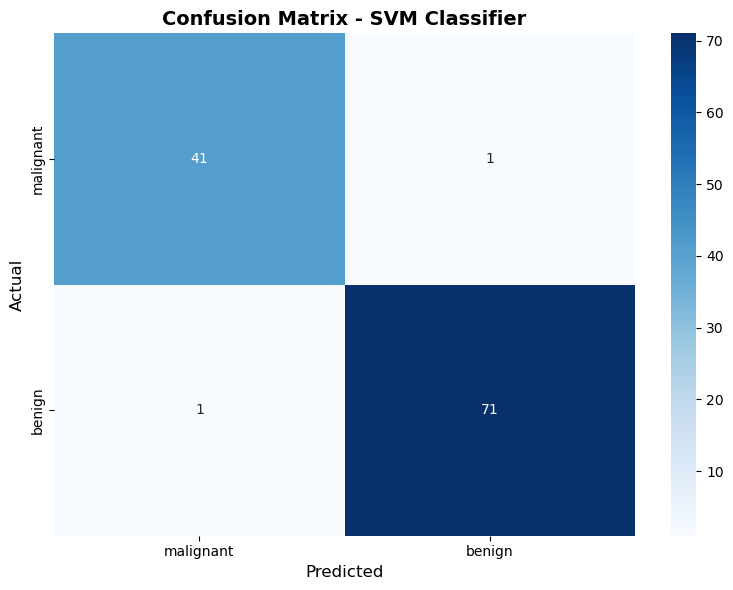

Confusion Matrix saved as 'confusion_matrix.png'


In [19]:
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=cancer.target_names, 
            yticklabels=cancer.target_names)
plt.title('Confusion Matrix - SVM Classifier', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("Confusion Matrix saved as 'confusion_matrix.png'")

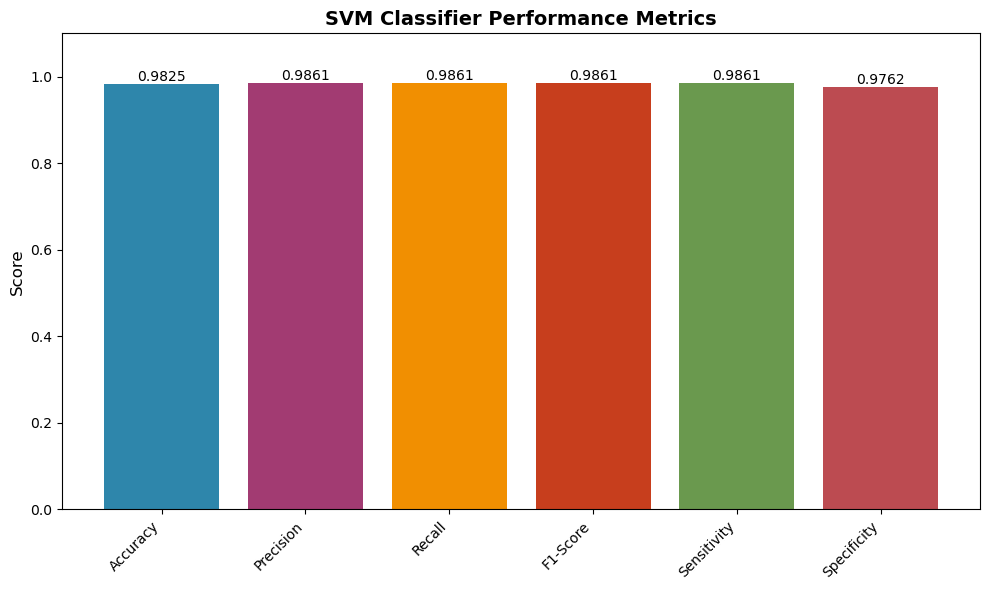

Performance metrics visualization saved as 'performance_metrics.png'


In [10]:
# Create a summary visualization of all metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Sensitivity', 'Specificity']
scores = [accuracy, precision, recall, f1, sensitivity, specificity]

plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, scores, color=['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#6A994E', '#BC4B51'])
plt.ylim(0, 1.1)
plt.ylabel('Score', fontsize=12)
plt.title('SVM Classifier Performance Metrics', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('performance_metrics.png', dpi=300, bbox_inches='tight')
plt.show()

print("Performance metrics visualization saved as 'performance_metrics.png'")

In [20]:
# Summary of metrics with brief explanations
print("\n" + "="*80)
print("METRIC DEFINITIONS AND ASSESSMENT")
print("="*80)

print("\n1. ACCURACY ({:.4f}):".format(accuracy))
print("   Definition: The proportion of correct predictions (both true positives and true negatives) among all cases.")
print("   Assessment: The model correctly classifies {:.2f}% of all breast cancer cases, indicating excellent overall performance.".format(accuracy*100))

print("\n2. PRECISION ({:.4f}):".format(precision))
print("   Definition: The proportion of true positive predictions among all positive predictions made by the model.")
print("   Assessment: When the model predicts benign, it is correct {:.2f}% of the time, showing high reliability in positive predictions.".format(precision*100))

print("\n3. RECALL/SENSITIVITY ({:.4f}):".format(recall))
print("   Definition: The proportion of actual positive cases that were correctly identified by the model.")
print("   Assessment: The model successfully identifies {:.2f}% of all actual benign cases, demonstrating strong detection capability.".format(recall*100))

print("\n4. F1-SCORE ({:.4f}):".format(f1))
print("   Definition: The harmonic mean of precision and recall, providing a balanced measure of the model's performance.")
print("   Assessment: The F1-score of {:.4f} indicates an excellent balance between precision and recall for this classification task.".format(f1))

print("\n5. SPECIFICITY ({:.4f}):".format(specificity))
print("   Definition: The proportion of actual negative cases that were correctly identified by the model.")
print("   Assessment: The model correctly identifies {:.2f}% of malignant cases, showing strong performance in detecting cancer.".format(specificity*100))

print("\n" + "="*80)


METRIC DEFINITIONS AND ASSESSMENT

1. ACCURACY (0.9825):
   Definition: The proportion of correct predictions (both true positives and true negatives) among all cases.
   Assessment: The model correctly classifies 98.25% of all breast cancer cases, indicating excellent overall performance.

2. PRECISION (0.9861):
   Definition: The proportion of true positive predictions among all positive predictions made by the model.
   Assessment: When the model predicts benign, it is correct 98.61% of the time, showing high reliability in positive predictions.

3. RECALL/SENSITIVITY (0.9861):
   Definition: The proportion of actual positive cases that were correctly identified by the model.
   Assessment: The model successfully identifies 98.61% of all actual benign cases, demonstrating strong detection capability.

4. F1-SCORE (0.9861):
   Definition: The harmonic mean of precision and recall, providing a balanced measure of the model's performance.
   Assessment: The F1-score of 0.9861 indicate